### Data Dictionary

In this notebook, we learn how to use scikit-learn to implement Multiple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *
from pycaret.clustering import *
from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV 4X4,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [6]:
df.shape

(1067, 13)

In [7]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### Data Exploration

### Data Visualization

### Univariate Data Exploration

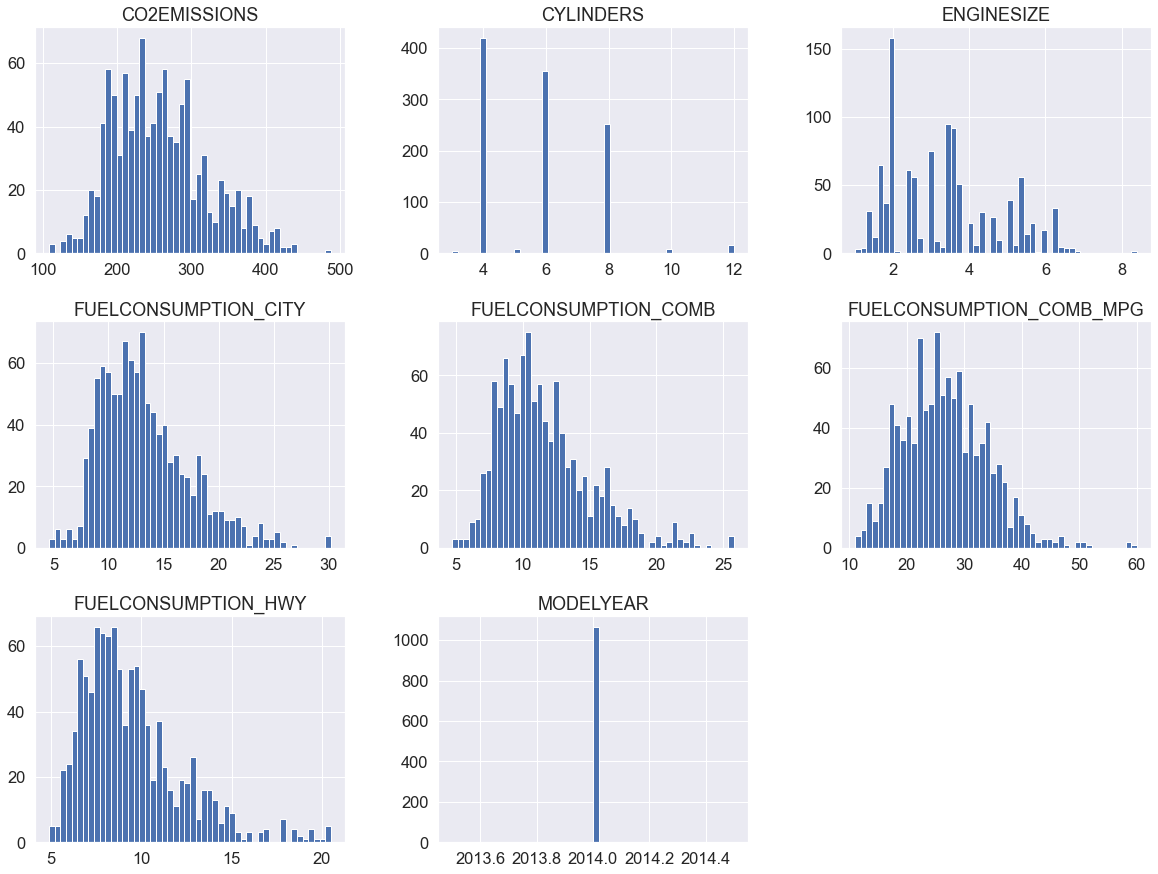

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Using Pycaret

In [9]:
exp_reg = setup(data = df, target = 'CO2EMISSIONS', session_id=123, normalize=True) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1067, 13)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.123800,20.040700,3.967100,0.995400,0.012800,0.007900
1,Extra Trees Regressor,2.136500,23.028300,4.340700,0.994700,0.015500,0.008100
2,Gradient Boosting Regressor,3.185300,29.072700,5.197900,0.992900,0.018800,0.012100
3,Extreme Gradient Boosting,3.124200,30.459400,5.282500,0.992500,0.019900,0.012200
4,Random Forest,2.602000,34.784700,5.370800,0.991800,0.020200,0.010000
5,Ridge Regression,4.209300,39.041500,6.198100,0.990500,0.025900,0.016300
6,Decision Tree,2.592400,41.308600,5.708500,0.990200,0.020700,0.009800
7,Bayesian Ridge,4.329000,40.851300,6.348000,0.990100,0.028500,0.017100
8,Huber Regressor,3.336200,42.693400,6.332700,0.989700,0.025100,0.012600
9,Passive Aggressive Regressor,4.681500,48.071900,6.894100,0.988200,0.030800,0.018800


In [11]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3437,24.6931,4.9692,0.9933,0.0163,0.0086
1,2.0770,10.0234,3.1660,0.9975,0.0131,0.0085
2,3.2319,92.5032,9.6179,0.9807,0.0240,0.0107
3,1.7605,7.4148,2.7230,0.9980,0.0087,0.0065
4,2.6697,18.4205,4.2919,0.9955,0.0138,0.0100
5,1.8766,9.4293,3.0707,0.9975,0.0125,0.0074
6,1.7267,8.1353,2.8523,0.9974,0.0095,0.0065
7,1.7437,7.1813,2.6798,0.9984,0.0086,0.0064
8,1.4972,3.9060,1.9764,0.9989,0.0084,0.0060
9,2.3113,18.7002,4.3244,0.9968,0.0132,0.0084


In [12]:
print(cat)

In [13]:
tuned_cat = tune_model('catboost', optimize='mse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9888,21.7148,4.6599,0.9941,0.0160,0.0112
1,2.9373,18.8690,4.3438,0.9953,0.0169,0.0118
2,3.3946,63.9741,7.9984,0.9867,0.0216,0.0121
3,2.5985,15.4549,3.9313,0.9959,0.0131,0.0100
4,3.2162,25.3469,5.0346,0.9937,0.0180,0.0123
5,2.9746,19.9052,4.4615,0.9948,0.0190,0.0124
6,2.3126,11.6182,3.4086,0.9963,0.0124,0.0090
7,2.6361,12.7928,3.5767,0.9972,0.0128,0.0099
8,2.2860,10.5048,3.2411,0.9971,0.0149,0.0095
9,2.9958,27.0668,5.2026,0.9954,0.0164,0.0112


In [14]:
print(tuned_cat)

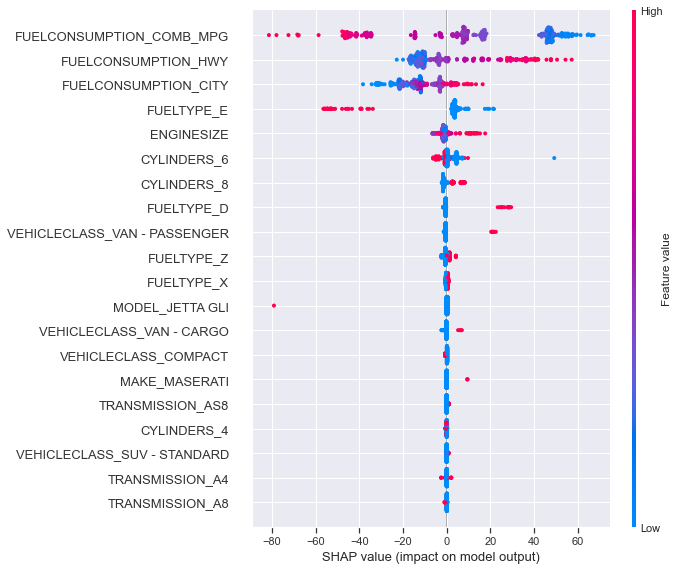

In [15]:
interpret_model(tuned_cat)

In [16]:
evaluate_model(tuned_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
predict_model(tuned_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,3.0919,24.3042,4.9299,0.9935,0.0189,0.012


,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,MAKE_ACURA,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,...,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z,MODELYEAR_month_1,MODELYEAR_weekday_2,MODELYEAR_is_month_end_0,MODELYEAR_is_month_start_1,CO2EMISSIONS,Label
0,-1.233931,-1.292048,-1.315552,1.816237,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,161,161.8972
1,0.108606,0.513125,0.546111,-0.728905,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,308,307.4276
2,-0.244694,0.342365,0.044894,-0.460996,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,285,285.6385
3,0.885864,0.439942,0.295503,-0.594950,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,297,296.4040
4,0.179265,0.903432,0.617714,-0.862860,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,230,227.1712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,-0.597993,-1.828721,-1.172347,2.753921,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,138,136.9188
317,-0.244694,0.000846,0.009093,-0.327041,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,267,264.7978
318,-1.233931,-1.023712,-0.993341,1.146463,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,184,185.6225
319,-0.951292,-0.755375,-0.599528,0.610643,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,209,208.2385
